In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = acquire.get_zillow_data()

In [3]:
# df = wrangle.handle_nulls(df)

In [4]:
# df.isnull().sum()

In [5]:
# df.to_csv('zillow_df.csv')

In [6]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(user, password, host, dbname)

In [7]:
def get_zillow_data():
    
   query = '''
   SELECT properties_2017.parcelid, bathroomcnt, bedroomcnt, buildingqualitytypeid, calculatedfinishedsquarefeet,  
finishedsquarefeet12, fips, fullbathcnt, latitude, longitude, lotsizesquarefeet, propertycountylandusecode,     
regionidcity, regionidcounty, regionidzip, roomcnt, unitcnt, yearbuilt, 
structuretaxvaluedollarcnt,taxvaluedollarcnt, assessmentyear, 
landtaxvaluedollarcnt, taxamount,                      
predictions_2017.logerror,                       
predictions_2017.transactiondate,                
heatingorsystemdesc,            
propertylandusedesc
FROM properties_2017
JOIN predictions_2017 USING(parcelid)
LEFT JOIN airconditioningtype USING(airconditioningtypeid)
LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
LEFT JOIN buildingclasstype USING(buildingclasstypeid)
LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
LEFT JOIN propertylandusetype USING(propertylandusetypeid)
LEFT JOIN storytype USING(storytypeid)
LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
WHERE latitude IS NOT NULL
AND longitude IS NOT NULL
AND bathroomcnt > 0
AND bedroomcnt > 0
   '''
   df = pd.read_sql(query, get_db_url('zillow'))
   return df

In [8]:
df = get_zillow_data()

In [9]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,14297519,3.5,4.0,NaN,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Single Family Residential
1,17052889,1.0,2.0,NaN,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Single Family Residential
2,14186244,2.0,3.0,NaN,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Single Family Residential
3,12177905,3.0,4.0,8.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Single Family Residential
4,10887214,3.0,3.0,8.0,1312.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,...,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,Condominium


In [10]:
df = wrangle.handle_nulls(df)

In [11]:
df.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

In [12]:
df['tax_rate'] = df['taxamount']/df['taxvaluedollarcnt']

In [13]:
# df = pd.read_csv('zillow_df.csv')  

In [14]:
# df = df.drop(df.columns[0], axis=1)

In [15]:
# df.head()

In [16]:
# df.info()

In [17]:
X = df.drop(columns = ['parcelid', 'logerror', 'bathroomcnt', 
                                   'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'structuretaxvaluedollarcnt', 
                                   'landtaxvaluedollarcnt','propertycountylandusecode',
                                   'heatingorsystemdesc','propertylandusedesc','finishedsquarefeet12',
                                   'fullbathcnt','assessmentyear','regionidcounty','taxvaluedollarcnt',
                                   'taxamount']) 
y = df[['logerror']]

In [18]:
print(X.shape)
print(y.shape)

(75206, 10)
(75206, 1)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [20]:
X_train.head()

,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,roomcnt,unitcnt,yearbuilt,tax_rate
5188,3.0,6.0,1155.0,6037.0,34031223.0,-117889202.0,0.0,1.0,1977.0,0.014999
26108,3.0,6.0,1236.0,6037.0,34034633.0,-118370357.0,0.0,1.0,1995.0,0.012190
75408,2.0,8.0,990.0,6037.0,34107500.0,-117901000.0,0.0,1.0,1980.0,0.012276
1228,3.0,6.0,1848.0,6037.0,34194625.0,-118428949.0,0.0,1.0,1955.0,0.012093
24987,3.0,6.0,1386.0,6037.0,34032930.0,-118010047.0,0.0,1.0,1962.0,0.012643


In [21]:
scaler = MinMaxScaler(copy=True)
X_train[['calculatedfinishedsquarefeet']] = scaler.fit_transform(X_train[['calculatedfinishedsquarefeet']])

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,roomcnt,unitcnt,yearbuilt,tax_rate
5188,-0.007283,-0.007136,-0.007427,0.287634,1663.297703,-5761.943011,-0.007429,-0.00738,0.089198,-0.007428
26108,-0.007283,-0.007136,-0.007427,0.287634,1663.464370,-5785.459873,-0.007429,-0.00738,0.090078,-0.007429
75408,-0.007331,-0.007038,-0.007427,0.287634,1667.025806,-5762.519648,-0.007429,-0.00738,0.089345,-0.007429
1228,-0.007283,-0.007136,-0.007425,0.287634,1671.284115,-5788.323607,-0.007429,-0.00738,0.088123,-0.007429
24987,-0.007283,-0.007136,-0.007426,0.287634,1663.381134,-5767.849413,-0.007429,-0.00738,0.088465,-0.007429


     k           sse
0    2  1.165051e+07
1    3  7.961918e+06
2    4  5.767412e+06
3    5  4.181707e+06
4    6  3.103278e+06
5    7  2.533569e+06
6    8  2.076803e+06
7    9  1.819397e+06
8   10  1.563609e+06
9   11  1.343669e+06
10  12  1.226460e+06
11  13  1.113278e+06
12  14  1.021758e+06
13  15  9.448694e+05
14  16  8.796634e+05
15  17  8.216065e+05
16  18  7.750370e+05
17  19  7.357962e+05


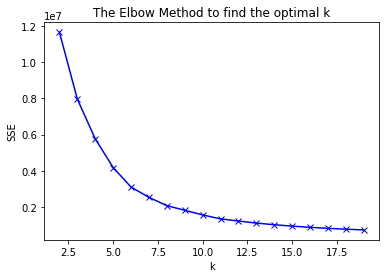

In [22]:
cluster_vars = train_scaled[['latitude', 'longitude', 'roomcnt']]

ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_vars)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [23]:
# find clusters

kmeans = KMeans(n_clusters=10, random_state = 447)
train_cluster_array = kmeans.fit_predict(train_scaled[['longitude', 'latitude', 'roomcnt']])
test_cluster_array = kmeans.predict(test_scaled[['longitude', 'latitude', 'roomcnt']])    

train_cluster_array

array([5, 4, 5, ..., 2, 2, 7], dtype=int32)

In [24]:
# create df of cluster id with each observation

train_clusters = pd.DataFrame(train_cluster_array, columns = ['area_cluster_id'], index = train_scaled.index)

test_clusters = pd.DataFrame(test_cluster_array, columns = ['area_cluster_id'], index = test_scaled.index)

train_clusters.head()

,area_cluster_id
5188,5
26108,4
75408,5
1228,4
24987,5


In [25]:
X_train = pd.concat([X_train, train_clusters], axis = 1)
train_scaled = pd.concat([train_scaled, train_clusters], axis = 1)
X_test = pd.concat([X_test, test_clusters], axis = 1)
test_scaled = pd.concat([test_scaled, test_clusters], axis = 1)

In [26]:
X_train.head()

,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,roomcnt,unitcnt,yearbuilt,tax_rate,area_cluster_id
5188,3.0,6.0,0.049022,6037.0,34031223.0,-117889202.0,0.0,1.0,1977.0,0.014999,5
26108,3.0,6.0,0.052981,6037.0,34034633.0,-118370357.0,0.0,1.0,1995.0,0.012190,4
75408,2.0,8.0,0.040958,6037.0,34107500.0,-117901000.0,0.0,1.0,1980.0,0.012276,5
1228,3.0,6.0,0.082893,6037.0,34194625.0,-118428949.0,0.0,1.0,1955.0,0.012093,4
24987,3.0,6.0,0.060313,6037.0,34032930.0,-118010047.0,0.0,1.0,1962.0,0.012643,5


In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=('centroid_latitude', 'centroid_longitude', 'centroid_room_count')).reset_index()
centroids.rename(columns = {'index': 'area_cluster_id'}, inplace = True)

In [28]:
centroids

,area_cluster_id,centroid_latitude,centroid_longitude,centroid_room_count
0,0,-5824.760127,1674.008408,-0.007135
1,1,-5762.741948,1649.880833,-0.007217
2,2,-5793.125228,1675.282556,-0.007422
3,3,-5751.683069,1641.252888,-0.007313
4,4,-5786.337957,1665.546833,-0.007429
5,5,-5761.674562,1662.542113,-0.007381
6,6,-5773.340004,1692.490531,-0.007429
7,7,-5774.539476,1667.104924,-0.007429
8,8,-5807.890246,1672.015304,-0.007155
9,9,-5778.839957,1654.613180,-0.007425


In [32]:
X_train = X_train.merge(centroids, left_on = 'area_cluster_id', right_on ='area_cluster_id')
train_scaled = pd.merge(train_scaled, centroids, how = 'left')
X_test = pd.merge(X_test, centroids, how = 'left')
test_scaled = pd.merge(test_scaled, centroids, how = 'left')

In [33]:
train_scaled.head()

,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,roomcnt,unitcnt,yearbuilt,tax_rate,area_cluster_id,centroid_latitude,centroid_longitude,centroid_room_count
0,-0.007283,-0.007136,-0.007427,0.287634,1663.297703,-5761.943011,-0.007429,-0.00738,0.089198,-0.007428,5,-5761.674562,1662.542113,-0.007381
1,-0.007283,-0.007136,-0.007427,0.287634,1663.464370,-5785.459873,-0.007429,-0.00738,0.090078,-0.007429,4,-5786.337957,1665.546833,-0.007429
2,-0.007331,-0.007038,-0.007427,0.287634,1667.025806,-5762.519648,-0.007429,-0.00738,0.089345,-0.007429,5,-5761.674562,1662.542113,-0.007381
3,-0.007283,-0.007136,-0.007425,0.287634,1671.284115,-5788.323607,-0.007429,-0.00738,0.088123,-0.007429,4,-5786.337957,1665.546833,-0.007429
4,-0.007283,-0.007136,-0.007426,0.287634,1663.381134,-5767.849413,-0.007429,-0.00738,0.088465,-0.007429,5,-5761.674562,1662.542113,-0.007381
